In [ ]:
!pip install matplotlib==3.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
!pip install importlib-metadata==4.13.0
!pip install dionysus
!pip install gudhi
!pip install networkx
!pip install persim
!pip install xarray
!pip install validclust
!pip install zarr
!pip install POT==0.5.1

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.8.0
    Uninstalling importlib-metadata-6.8.0:
      Successfully uninstalled importlib-metadata-6.8.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dionysus: filename=dionysus-2.0.10-cp310-cp310-linux_x86_64.whl size=440669 sha256=c7d184ec18541d140de43a2be57fbed29038b2a1a97c180c015030857ee5da1c
  Stored in directory: /root/.cache/pip/wheels/1d/8f/2a/22f69fac8dab81069f0501bdd69961a69e82b8b3007f191a15
Successfully built dionysus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=2bb045a0a0b54ce9fa7645399d8504fcb6ee4ef861b157a3d369ac2db1dea9ea
  Stored in

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/NASA")
!ls -ltr

total 14446
-rw------- 1 root root    1667 Oct  5  2022  zigzagtools.py
-rw------- 1 root root   85452 Oct  5  2022  zigzag_PD_eps_1.pdf
-rw------- 1 root root       0 Oct  5  2022  VRrips.pk
-rw------- 1 root root  133051 Oct  5  2022  PIs_labelled_modulo_month.pdf
-rw------- 1 root root  132779 Oct  5  2022  PIs_labelled_modulo_month_1.pdf
-rw------- 1 root root  105850 Oct  5  2022  PIs_labelled_modulo_month_0.pdf
-rw------- 1 root root  127787 Oct  5  2022  PIs_labelled_1.pdf
-rw------- 1 root root  116243 Oct  5  2022  PIs_labelled_0.pdf
-rw------- 1 root root  253295 Oct  5  2022  PClouds.pdf
-rw------- 1 root root 1682280 Oct  5  2022  Merra_t2m_freudenthal_Oct_2022.ipynb
-rw------- 1 root root  324306 Oct  5  2022  Merra_t2m_freudenthal.ipynb
-rw------- 1 root root  323836 Oct  5  2022  MERRA2_t2m_GP_20210201-20210228.nc
-rw------- 1 root root 1690684 Oct  5  2022  MERRA2_t2m_CONUS_20210201-20210228.nc
-rw------- 1 root root  527019 Oct  5  2022  MERRA2_t2m_CONUS_20210201-20210

In [ ]:
from __future__ import print_function
import pickle
#import zigzagtools as zzt
import numpy as np
from numpy import linalg as LA
import pandas as pd
#import networkx as nx
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from scipy.stats import expon
import scipy
import dionysus as d
import matplotlib.pyplot as plt
import time
#import netCDF4
import numpy as np
import gudhi as gd
#import networkx as nx
from persim import PersImage
import sys
import time
from validclust import dunn, cop, ValidClust
import itertools
from tqdm import tqdm
import itertools

In [ ]:
import os
# added
import ot
from gudhi.wasserstein import wasserstein_distance as wd
#import regrid_hp as rhp
#import cartopy.crs as ccrs
#import healpy as hp
import xarray as xr
import mpl_toolkits
#from cartopy.io import shapereader
#from mpl_toolkits.basemap import Basemap
#import ocw.utils as utils
#import ocw.data_source.local as local
#import ocw.dataset_processor as dsp
#from ocw.dataset import Bounds as Bounds
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from persim import wasserstein
from sklearn.cluster import DBSCAN
import zarr
#import seaborn as sns
#sns.set_theme()

In [ ]:
path = os.getcwd()
#%% Parameters
#nameFolderCloud = path + '/PointCloud/5_Dimensions/datafullpc'  # Example 1 (Dorcas)  (sizeWindow = 10) * It has not any interesting structures
#nameFolderCloud = path + '/PointCloud/FIG8Saved_40/File'  # Example 2  (sizeWindow = 12)
#nameFolderCloud = path + '/../Example_POINT_CLOUD/PointCloud/FIG8Saved_60/File'  # Example 3  (sizeWindow = 12)
#scaleParameter = 1.0 # [Example 2 and 3] Maximum Scale Parameter for Filtration (Depends on distance between points)
#scaleParameter = 9.0 # [Example 1] Maximum Scale Parameter for Filtration (Depends on distance between points)
maxDimHoles = 2 # Maximum Dimension of Holes (It means.. 0 and 1)
sizeWindow = 28 # [Example 2 and 3] Number of Point-Clouds (i.e. timestamps)
#sizeWindow = 10 # [Example 1] Number of Point-Clouds (i.e. timestamps)

In [ ]:
def extract_PD_arrays_with_cubical_complex(data, infinity = 300.):
    cubical_complex = gd.CubicalComplex(top_dimensional_cells=data)
    PD_CC = cubical_complex.persistence()
    dim = np.array([i[0] for i in PD_CC])
    birth = np.array([i[1][0] for i in PD_CC])
    death = np.array([i[1][1] for i in PD_CC])
    death[death==np.Infinity] = infinity
    n0 = dim[dim==0].size
    n1 = dim[dim==1].size
    pd0 = np.zeros([n0, 2])
    pd1 = np.zeros([n1, 2])
    pd0[:,0] = birth[dim==0]
    pd0[:,1] = death[dim==0]
    pd1[:,0] = birth[dim==1]
    pd1[:,1] = death[dim==1]
    return cubical_complex, pd0, pd1

def calculate_wasserstein_distance(pd0_array1, pd0_array2, pd1_array1, pd1_array2, order=2):
    return wd(pd0_array1, pd0_array2, order=order) + wd(pd1_array1, pd1_array2, order=order)

In [ ]:
def extract_PD_arrays_with_freudenthal_triangulation(data, lower =240., infinity = 300.):

    f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
    p = d.homology_persistence(f_lower_star)
    dgms = d.init_diagrams(p, f_lower_star)
    birth0=np.array([dgm.birth for dgm in dgms[0]])
    death0=np.array([dgm.death for dgm in dgms[0]])
    death0[death0==np.Infinity] = infinity
    birth1=np.array([dgm.birth for dgm in dgms[1]])
    death1=np.array([dgm.death for dgm in dgms[1]])
    death1[death1==np.Infinity] = infinity

    return [[birth0,death0],[birth1,death1]]

In [ ]:
def plot_PDs (pd0_array, pd1_array, titles, lower_bound=240, upper_bound=300):
    fig = plt.figure(figsize=(25,15))
    nday = len(pd0_array)
    for iday in np.arange(nday):
        ax = fig.add_subplot(4,7,1+iday)
        ax.scatter(pd0_array[iday][:,0], pd0_array[iday][:,1], color='r', s=5, label = '0')
        ax.scatter(pd1_array[iday][:,0], pd1_array[iday][:,1], marker='^', s=5,
               facecolors='none', edgecolor='blue', label = '1')

        ax.plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
        #ax.set_xlim([lower_bound, upper_bound])
        #ax.set_ylim([lower_bound, upper_bound])
        ax.set_title(titles[iday])
        #ax.set_xlabel('Birth')
        #ax.set_ylabel('Death')
        #ax.set_xticks(np.arange(4)*20+240)
        #ax.set_xticklabels(np.repeat('',4))
        #ax.set_yticks(np.arange(4)*20+240)
        #ax.set_yticklabels(np.repeat('',4))

In [ ]:
def plot_Dionysus_PDs(pd0_array, pd1_array, titles, lower_bound=240, upper_bound=300):
    fig = plt.figure(figsize=(30,20))
    nday = len(pd0_array)
    for iday in np.arange(nday):
        ax = fig.add_subplot(4,7,1+iday)
        ax.scatter(pd0_array[iday][0], pd0_array[iday][1], color='r', s=5, label = '0')
        ax.scatter(pd1_array[iday][0], pd1_array[iday][1], marker='^', s=5,
               facecolors='none', edgecolor='blue', label = '1')

        ax.plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
        #ax.set_xlim([lower_bound, upper_bound])
        #ax.set_ylim([lower_bound, upper_bound])
        ax.set_title(titles[iday])
        ax.set_xlabel('Birth')
        ax.set_ylabel('Death')
    #plt.savefig("pds.pdf",bbox_inches='tight')
    plt.show()


In [ ]:
def plot_Dionysus_PDs_by_Cluster(pd0_array, pd1_array, titles, cluster_labels, lower_bound=240, upper_bound=300):
    fig = plt.figure(figsize=(30,20))
    nday = len(pd0_array)
    idx0= np.where(cluster_labels==0)[0]
    idx1= np.where(cluster_labels==1)[0]

    ax = fig.add_subplot(2,2,1)
    for iday in idx0:
        ax.scatter(pd0_array[iday][0], pd0_array[iday][1], color='r', s=5, label = '0')
    ax = fig.add_subplot(2,2,2)
    for iday in idx0:
        ax.scatter(pd1_array[iday][0], pd1_array[iday][1], marker='^', s=5,
            facecolors='none', edgecolor='blue', label = '1')

    ax.plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
    ax.set_xlim([lower_bound, upper_bound])
    ax.set_ylim([lower_bound, upper_bound])
    #ax.set_title(titles[iday])
    ax.set_xlabel('Birth')
    ax.set_ylabel('Death')

    ax = fig.add_subplot(2,2,3)
    for iday in idx1:
        ax.scatter(pd0_array[iday][0], pd0_array[iday][1], color='r', s=5, label = '0')
    ax = fig.add_subplot(2,2,4)
    for iday in idx1:
        ax.scatter(pd1_array[iday][0], pd1_array[iday][1], marker='^', s=5,
               facecolors='none', edgecolor='blue', label = '1')

    ax.plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
    ax.set_xlim([lower_bound, upper_bound])
    ax.set_ylim([lower_bound, upper_bound])
    #ax.set_title(titles[iday])
    ax.set_xlabel('Birth')
    ax.set_ylabel('Death')

In [ ]:
def keyfunc(s):
    return s[0:5], int(s[5:7]), s[7], int(s[8:10])

def selectChannel(dir, channelNum):

    #tileList = [filename for filename in os.listdir(dir) if filename.startswith("Tile")]
    tempTileList = [filename for filename in os.listdir(dir) if filename.startswith("Tile")]

    print (len(tempTileList))
    tileList = []
    for i in tempTileList:
        temp = i.replace('.', '_')
        tempList = temp.split('_')
        tempList[1] = str(tempList[1].zfill(2))
        tempList[2] = str(tempList[2].zfill(2))
        result = '_'.join(tempList)
        result = result[0:10] + '.' + result[-4:]
        tileList.append(result)

    dict1 = dict(zip(tileList, tempTileList))
    print (dict1)
    tileList = sorted(tileList, key=keyfunc)
    print (len(tileList))
    # take first 80 tiles for test
    tileList = tileList#[0:300]
    data = np.empty((len(tileList), 32, 32))

    for i in range(len(tileList)):
        tempData = zarr.open(dir + '//' + dict1[tileList[i]])[:, :, channelNum]
        print (dict1[tileList[i]])
        data[i, :, :] = tempData

    return data

In [ ]:
def getAllChannelPDs(tileName, channelRange, infinity = 300):
    PD0 = np.array([[0, 0]])
    PD1 = np.array([[0, 0]])
    for i in range(channelRange):
        data = np.array(zarr.open(fname2 + '//' + tileName)[:, :, i])
        f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
        p = d.homology_persistence(f_lower_star)
        dgms = d.init_diagrams(p, f_lower_star)
        birth0=np.array([dgm.birth for dgm in dgms[0]])
        death0=np.array([dgm.death for dgm in dgms[0]])
        death0[death0==np.Infinity] = infinity
        birth1=np.array([dgm.birth for dgm in dgms[1]])
        death1=np.array([dgm.death for dgm in dgms[1]])
        death1[death1==np.Infinity] = infinity

        temp0 = np.vstack((birth0, death0)).T
        temp1 = np.vstack((birth1, death1)).T

        PD0 = np.concatenate((PD0, temp0))
        PD1 = np.concatenate((PD1, temp1))

    return PD0[1:, :], PD1[1:, :]

In [ ]:
def optimalDBSCAN(data, score_, eps, metric='euclidean', bMax=True, distType=0):
    eps_range=np.arange(eps['min'],eps['max'],eps['inc'])
    min_samples_range=range(2,10)
    if bMax==True:
        best_score =-1e9
    else:
        best_score =1e9

    eps_ask=0
    min_samples_ask=0
    clustering_ask=None
    print("score, best_score, eps, eps_ask, min_samples, min_samples_ask")
    for min_samples in min_samples_range:
     for eps in eps_range:
      clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
      clustering.fit(data)
      if len(np.unique(clustering.labels_))>1:
        if distType==0:
            score=score_(data, clustering.labels_)
        elif distType==1:
            dist=pairwise_distances(data)
            score=score_(dist, clustering.labels_)
        elif distType==2:
            dist=pairwise_distances(data)
            score=score_(data, dist, clustering.labels_)
        if (score>best_score and bMax==True):
          best_score=score
          eps_ask=eps
          min_samples_ask=min_samples
          clustering_ask=clustering
        elif(score<best_score and bMax==False):
          best_score=score
          eps_ask=eps
          min_samples_ask=min_samples
          clustering_ask=clustering
        print(score, best_score, eps, eps_ask, min_samples, min_samples_ask)
    return(best_score, eps_ask, min_samples_ask, clustering_ask)

In [ ]:
def optimalHClust(data, score_, metric='euclidean', bMax=True, distType=0):
    if bMax==True:
        best_score =-1e9
    else:
        best_score =1e9
    linkage_ask = ''
    n_ask = 2
    clustering_ask = None
    print("score, best_score, i, n_ask, linkage, linkage_ask")
    for i in range(2, 7):
     for linkage in ['complete', 'average', 'single']:
      clustering= AgglomerativeClustering(n_clusters=i, affinity=metric, linkage=linkage)
      #clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
      clustering.fit(data)
      if len(np.unique(clustering.labels_))>1:
        if distType==0:
            score=score_(data, clustering.labels_)
        elif distType==1:
            dist=pairwise_distances(data)
            score=score_(dist, clustering.labels_)
        elif distType==2:
            dist=pairwise_distances(data)
            score=score_(data, dist, clustering.labels_)
        if (score>best_score and bMax==True):
          best_score=score
          linkage_ask=linkage
          n_ask=i
          clustering_ask=clustering
        elif(score<best_score and bMax==False):
          best_score=score
          linkage_ask=linkage
          n_ask=i
          clustering_ask=clustering
        print(score, best_score, i, n_ask, linkage, linkage_ask)
    return(best_score, n_ask, linkage_ask, clustering_ask)

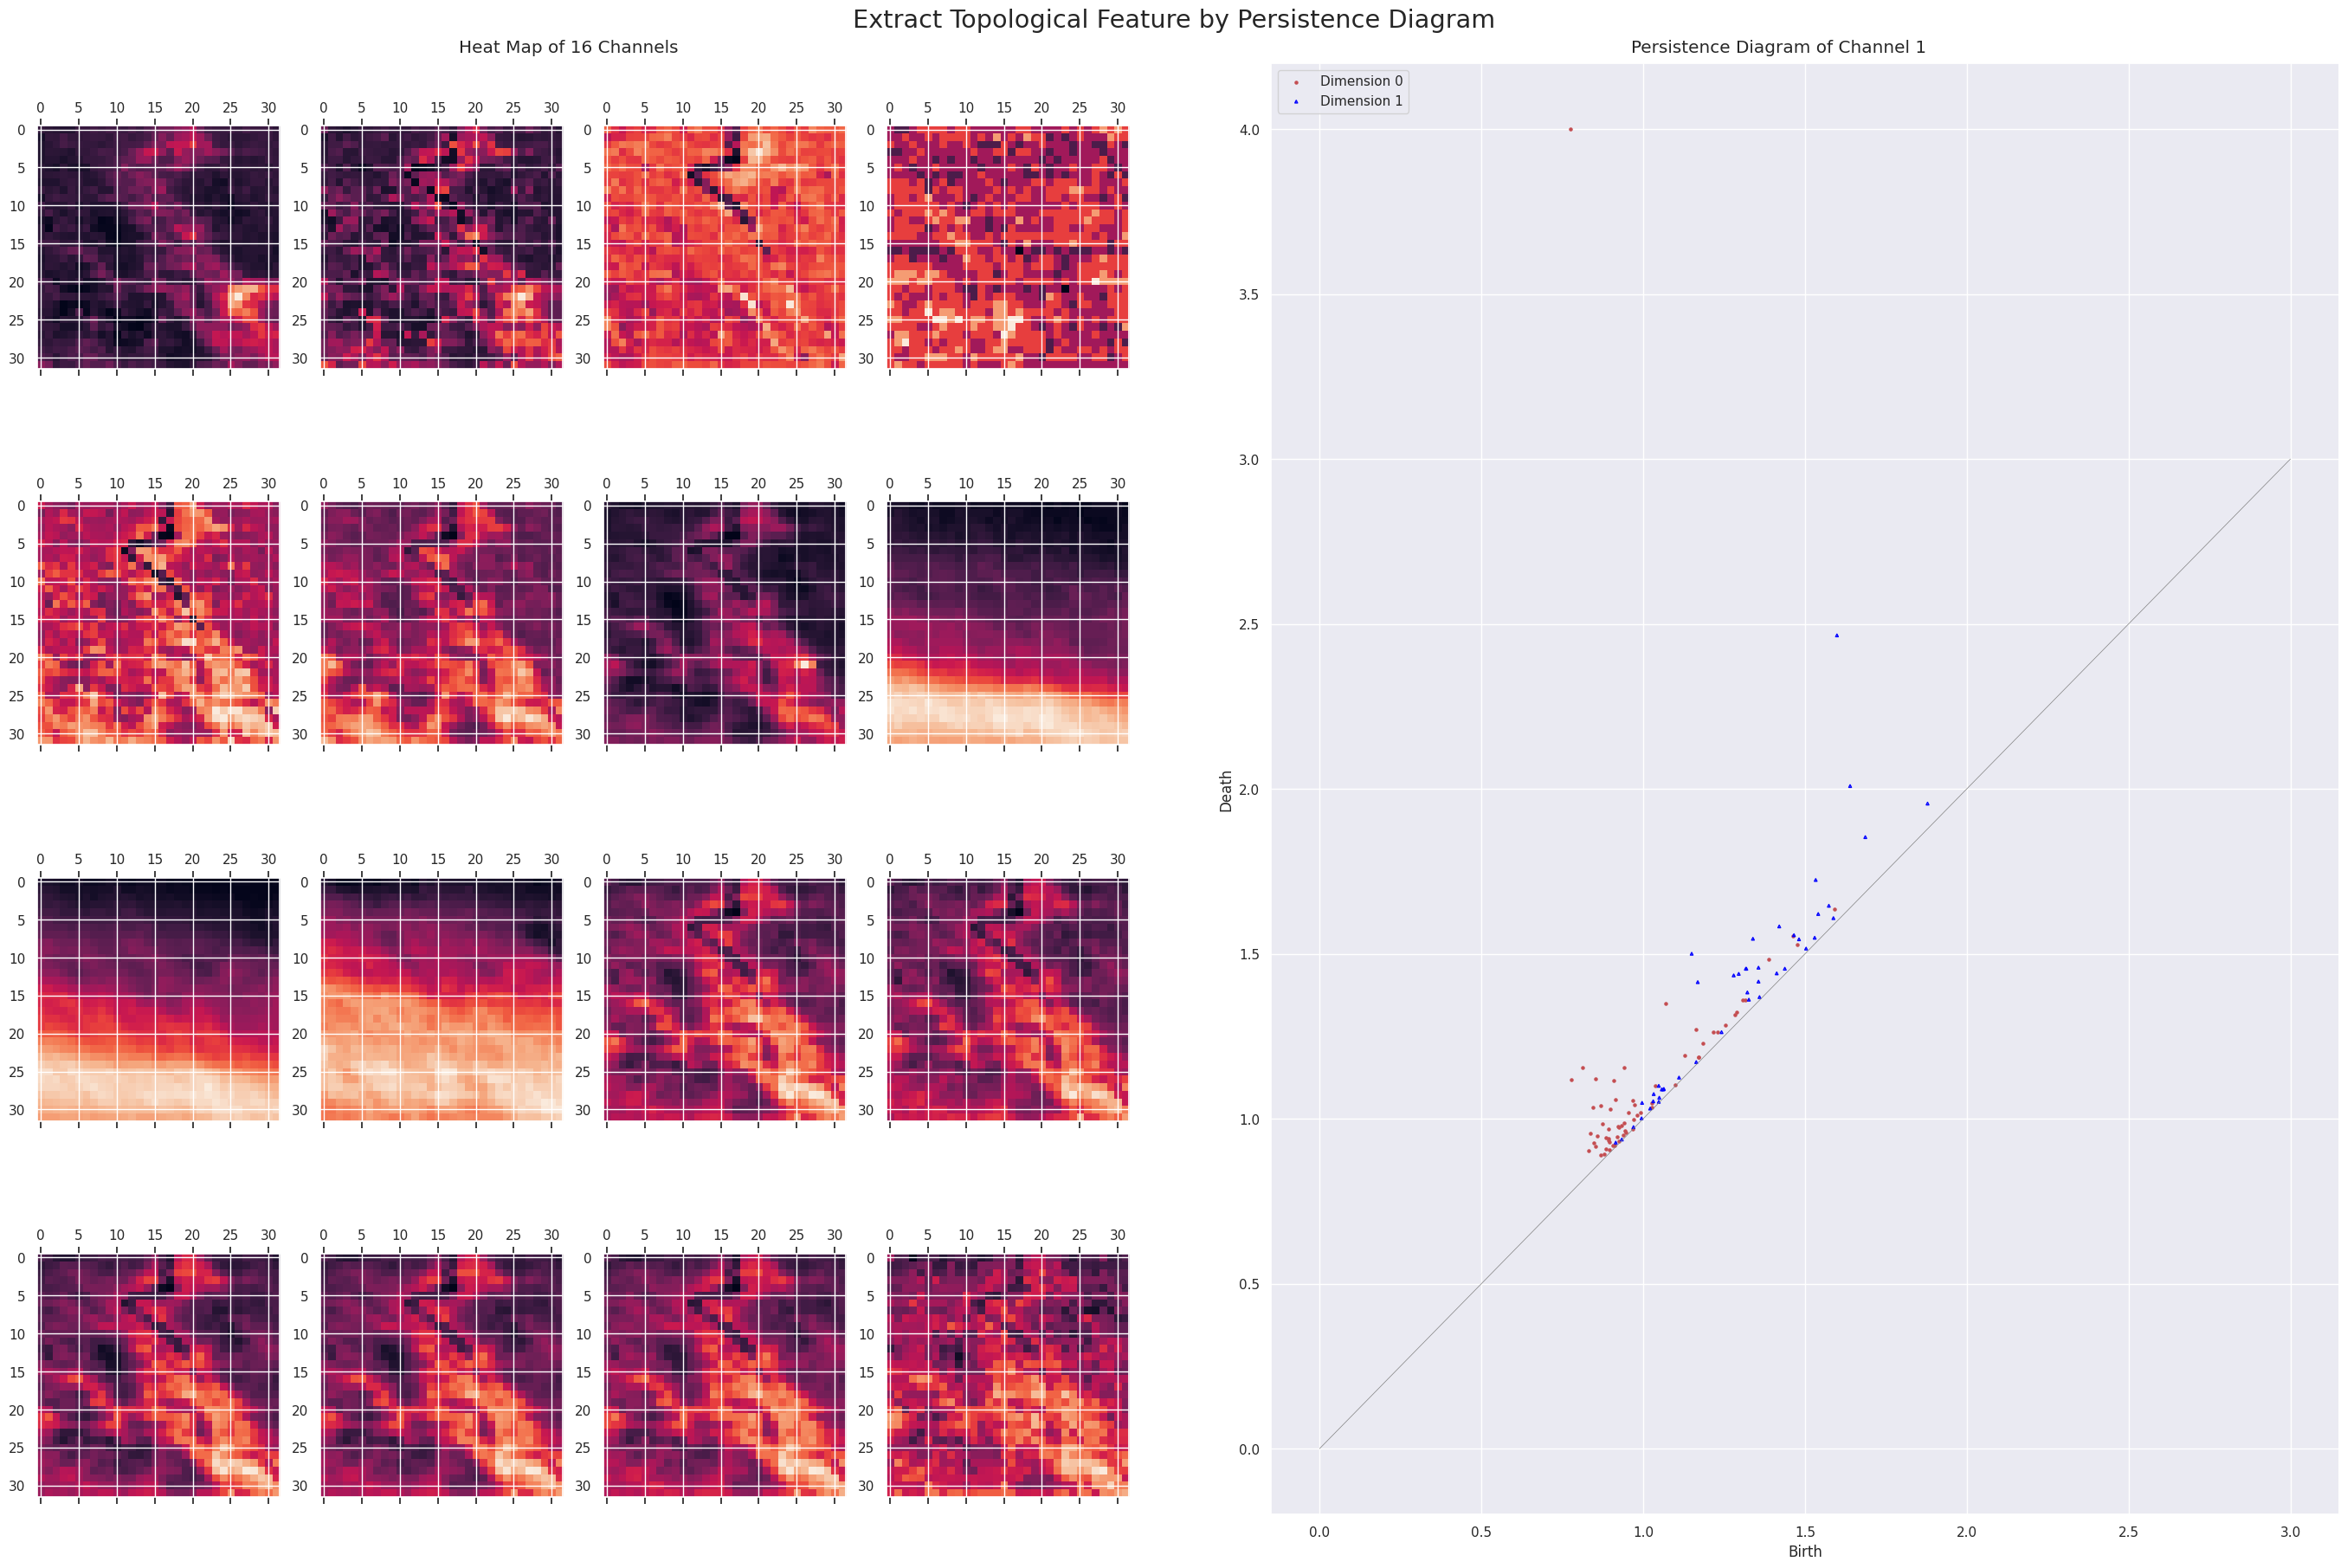

In [ ]:
fname2 = 'Sample Data'

fig = plt.figure(constrained_layout=True, figsize=(27, 18))
subfigs = fig.subfigures(1, 2, wspace=0.07)

for channelNum in np.arange(16):
    ax = subfigs[0].add_subplot(4,4,1+channelNum)
    tileNum = np.array(zarr.open(fname2 + '//' + 'Tile_1_33.zarr')[:, :, channelNum])
    ax.matshow(tileNum)
subfigs[0].suptitle('Heat Map of 16 Channels')

axsRight = subfigs[1].subplots(1, 1)
sampleData = np.array(zarr.open(fname2 + '//' + 'Tile_1_33.zarr')[:, :, 6])
f_lower_star = d.fill_freudenthal(sampleData)
p = d.homology_persistence(f_lower_star)
dgms = d.init_diagrams(p, f_lower_star)

# These two values changes on different channel since different channel have different value distributions.
lower_bound = 0
upper_bound = 4

birth0=np.array([dgm.birth for dgm in dgms[0]])
death0=np.array([dgm.death for dgm in dgms[0]])
death0[death0==np.Infinity] = upper_bound
birth1=np.array([dgm.birth for dgm in dgms[1]])
death1=np.array([dgm.death for dgm in dgms[1]])
death1[death1==np.Infinity] = upper_bound

axsRight.scatter(birth0, death0, color='r', s=5, label = 'Dimension 0')
axsRight.scatter(birth1, death1, marker='^', s=5, facecolors='none', edgecolor='blue', label = 'Dimension 1')
axsRight.legend(loc="upper left")

axsRight.plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
#axsRight.xlim([lower_bound, upper_bound])
#axsRight.ylim([lower_bound, upper_bound])
axsRight.set_xlabel('Birth')
axsRight.set_ylabel('Death')

subfigs[1].suptitle('Persistence Diagram of Channel 1')

fig.suptitle('Extract Topological Feature by Persistence Diagram', fontsize='xx-large')
plt.show()

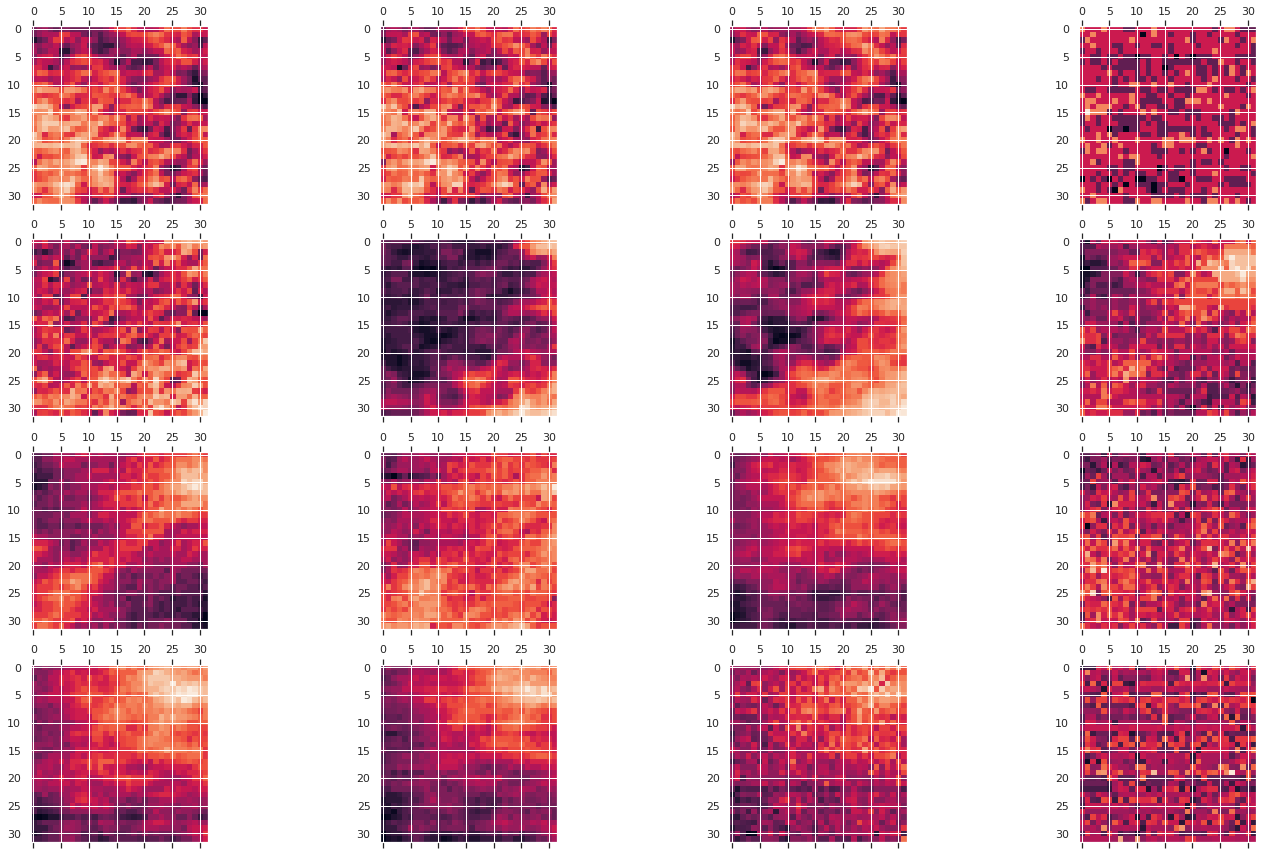

In [ ]:
fname2 = 'Sample Data'

fig= plt.figure(figsize=(24,15))

for channelNum in np.arange(16):
    ax = fig.add_subplot(4,4,1+channelNum)
    tileNum = np.array(zarr.open(fname2 + '//' + 'Tile_0_0.zarr')[:, :, channelNum])
    ax.matshow(tileNum)

plt.show()

Text(0.5, 1.0, 'Persistent Diagram of Channel 1')

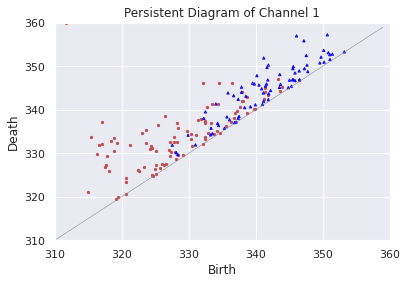

In [ ]:
sampleData = np.array(zarr.open(fname2 + '//' + 'Tile_0_0.zarr')[:, :, 0])
f_lower_star = d.fill_freudenthal(sampleData)
p = d.homology_persistence(f_lower_star)
dgms = d.init_diagrams(p, f_lower_star)

birth0=np.array([dgm.birth for dgm in dgms[0]])
death0=np.array([dgm.death for dgm in dgms[0]])
death0[death0==np.Infinity] = 360
birth1=np.array([dgm.birth for dgm in dgms[1]])
death1=np.array([dgm.death for dgm in dgms[1]])
death1[death1==np.Infinity] = 360

plt.scatter(birth0, death0, color='r', s=5, label = '0')
plt.scatter(birth1, death1, marker='^', s=5, facecolors='none', edgecolor='blue', label = '1')
lower_bound = 310
upper_bound = 360
plt.plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
plt.xlim([lower_bound, upper_bound])
plt.ylim([lower_bound, upper_bound])
plt.xlabel('Birth')
plt.ylabel('Death')
plt.title('Persistent Diagram of Channel 1')


1114


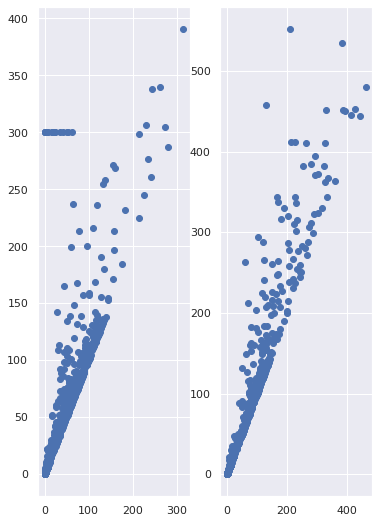

In [ ]:
fname2 = 'Sample Data'
a, b = getAllChannelPDs('Tile_5_37.zarr', 16)
print (len(a))

fig = plt.figure(figsize = (6, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(a[:, 0], a[:, 1])
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(b[:, 0], b[:, 1])
plt.show()

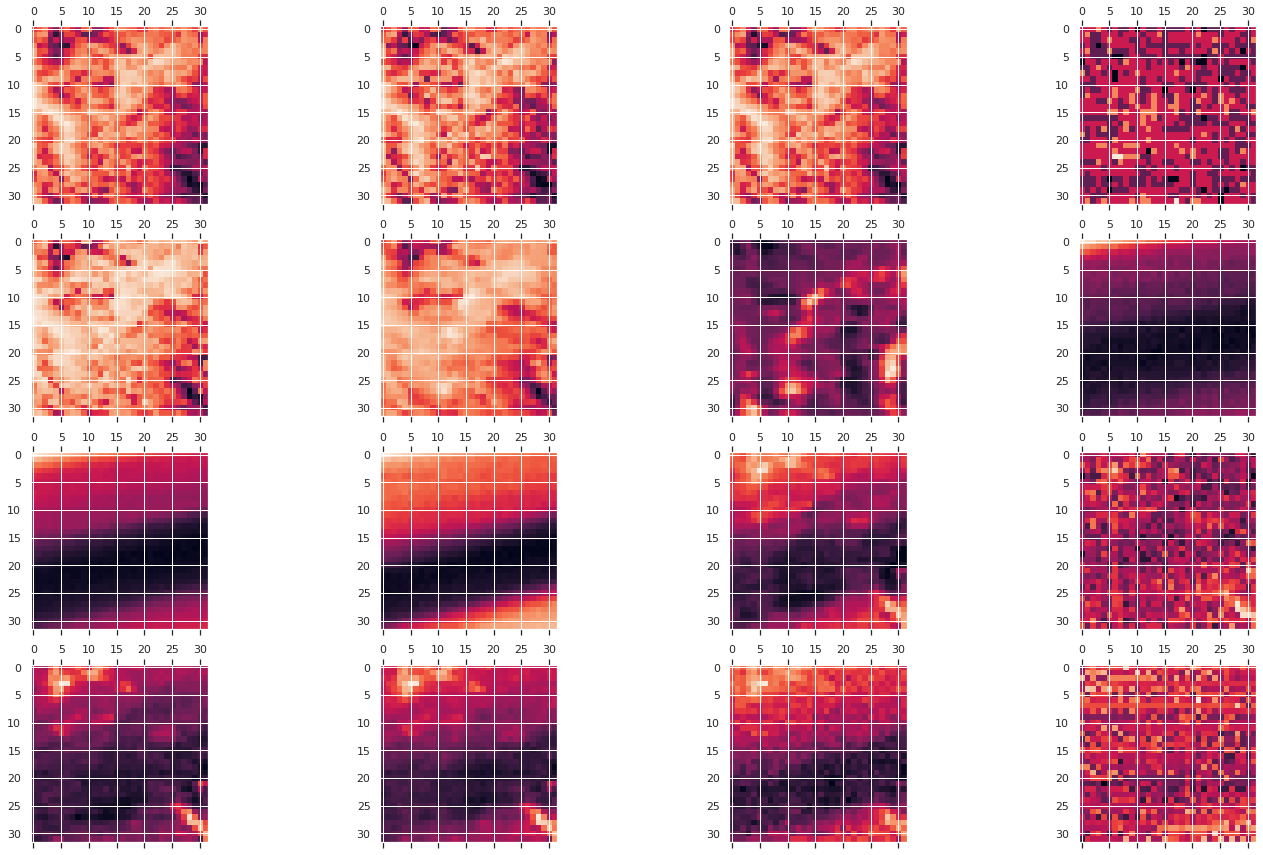

In [ ]:
'''
f = netCDF4.Dataset('MERRA2_t2m_CONUS_20210201-20210228_hp05.nc', 'r')
print(f)
'''
fname = 'MERRA2_t2m_GP_20210201-20210228.nc'
fname2 = 'Sample Data'

#ds = xr.open_dataset(fname)
#data = ds['t2m'].squeeze()

#lon = ds.lon
#lat = ds.lat

# data2 = zarr.open(fname2 + '//' +'Tile_0_0.zarr')[:, :, 0]
#data = selectChannel(fname2, channelNum)
#print (np.shape(data))

#tile0_0 = np.array(zarr.open(fname2 + '//' + 'Tile_0_0.zarr')[:, :, 5])
#plt.matshow(tile0_0)
# print (tile0_0)

fig= plt.figure(figsize=(24,15))
for channelNum in np.arange(16):
    ax = fig.add_subplot(4,4,1+channelNum)
    tileNum = np.array(zarr.open(fname2 + '//' + 'Tile_0_21.zarr')[:, :, channelNum])
    ax.matshow(tileNum)

plt.show()


In [ ]:
def getAllChannelPDs(tileName, channelRange, infinity = 300):
    PD0 = np.array([[0, 0]])
    PD1 = np.array([[0, 0]])
    for i in range(channelRange):
        data = np.array(zarr.open(fname2 + '//' + tileName)[:, :, i])
        f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
        p = d.homology_persistence(f_lower_star)
        dgms = d.init_diagrams(p, f_lower_star)
        birth0=np.array([dgm.birth for dgm in dgms[0]])
        death0=np.array([dgm.death for dgm in dgms[0]])
        death0[death0==np.Infinity] = infinity
        birth1=np.array([dgm.birth for dgm in dgms[1]])
        death1=np.array([dgm.death for dgm in dgms[1]])
        death1[death1==np.Infinity] = infinity

        temp0 = np.vstack((birth0, death0)).T
        temp1 = np.vstack((birth1, death1)).T

        PD0 = np.concatenate((PD0, temp0))
        PD1 = np.concatenate((PD1, temp1))

    return PD0[1:, :], PD1[1:, :]

In [ ]:
def channel2Mat(tile):
    channelLength = np.shape(zarr.open(fname2 + '//' + tile)[0, 0, :])[0]

    bd = np.zeros((channelLength, 10000))
    for i in range(channelLength):
        data = np.array(zarr.open(fname2 + '//' + tile)[:, :, i])
        f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
        p = d.homology_persistence(f_lower_star)
        dgms = d.init_diagrams(p, f_lower_star)
        birth0=np.array([dgm.birth for dgm in dgms[0]])
        death0=np.array([dgm.death for dgm in dgms[0]])
        death0[death0==np.Infinity] = np.partition(death0.flatten(), -2)[-2]
        birth1=np.array([dgm.birth for dgm in dgms[1]])
        death1=np.array([dgm.death for dgm in dgms[1]])
        death1[death1==np.Infinity] = np.partition(death1.flatten(), -2)[-2]
        temp0 = np.vstack((birth0, death0)).T
        temp1 = np.vstack((birth1, death1)).T
        temp = np.concatenate((temp0, temp1))
        # normalize the vector
        bdTemp = temp[:, 1] - temp[:, 0]
        bdTemp = (bdTemp - np.min(bdTemp)) / (np.max(bdTemp) - np.min(bdTemp))
        loc, scale = expon.fit(bdTemp)
        bdSample = np.random.exponential(scale=scale, size = 10000)
        bd[i, :] = bdSample

    corrMat = np.corrcoef(bd)
    return corrMat


In [ ]:
def fNorm(mat):
    singularValues = scipy.linalg.svdvals(mat)
    L2norm = np.linalg.norm(singularValues, ord=2)
    return L2norm

In [ ]:
tileList = ['Tile_0_0.zarr', 'Tile_1_10.zarr', 'Tile_4_5.zarr', 'Tile_6_15.zarr', 'Tile_1_33.zarr', 'Tile_2_35.zarr', 'Tile_3_33.zarr', 'Tile_5_37.zarr', 'Tile_13_37.zarr']

fname2 = 'Sample Data'
print (np.shape(channel2Mat('Tile_0_0.zarr')))

corrMat = []
for tile in tileList:
    corrMat.append(channel2Mat(tile))

disMat = np.zeros((len(tileList), len(tileList)))
for i in range(len(tileList)):
    for j in range(i+1, len(tileList)):
        disMat[i, j] = np.abs(fNorm(corrMat[i]) - fNorm(corrMat[j]))
        disMat[j, i] = disMat[i, j]

print (disMat)

In [ ]:
results = {}
results['pds']= {}
params = {}
params['pds']= {}
clusters = {}
clusters['pds']= {}

In [ ]:
results['DBSCAN'] = {}
params['DBSCAN'] = {}
clusters['DBSCAN'] = {}

In [ ]:
eps={'min':0.01, 'max':10, 'inc': 0.005}

In [ ]:
scores=['silhouette', 'calinski', 'davies', 'dunn','cop']
bMax= True
distType=0
for score in scores:
    print('======' + score + '======' )
    if(score=='silhouette'):
        f= lambda data, labels: silhouette_score(data, labels)
    elif(score=='calinski'):
        f= lambda data, labels: calinski_harabasz_score(data, labels)
    elif(score=='davies'):
        f= lambda data, labels: davies_bouldin_score(data, labels)
        bMax=False
    elif(score == 'dunn'):
        f= lambda dist, labels: dunn(dist, labels)
        distType =1
    elif(score == 'cop'):
        f= lambda data, dist, labels: cop(data, dist, labels)
        distType =2
    results['DBSCAN'][score] = {}
    params['DBSCAN'][score] = {}
    clusters['DBSCAN'][score] = {}
    [score_, eps_, min_samples_, clusters_]= optimalDBSCAN(data=disMat, score_=f, eps=eps, metric='precomputed', bMax=bMax, distType=distType)
    results['DBSCAN'][score]= score_
    params['DBSCAN'][score]['eps'] = eps_
    params['DBSCAN'][score]['min_samples'] = min_samples_
    clusters['DBSCAN'][score] = clusters_

In [ ]:
for key in clusters['DBSCAN'].keys():

    print (clusters['DBSCAN'][key].labels_)

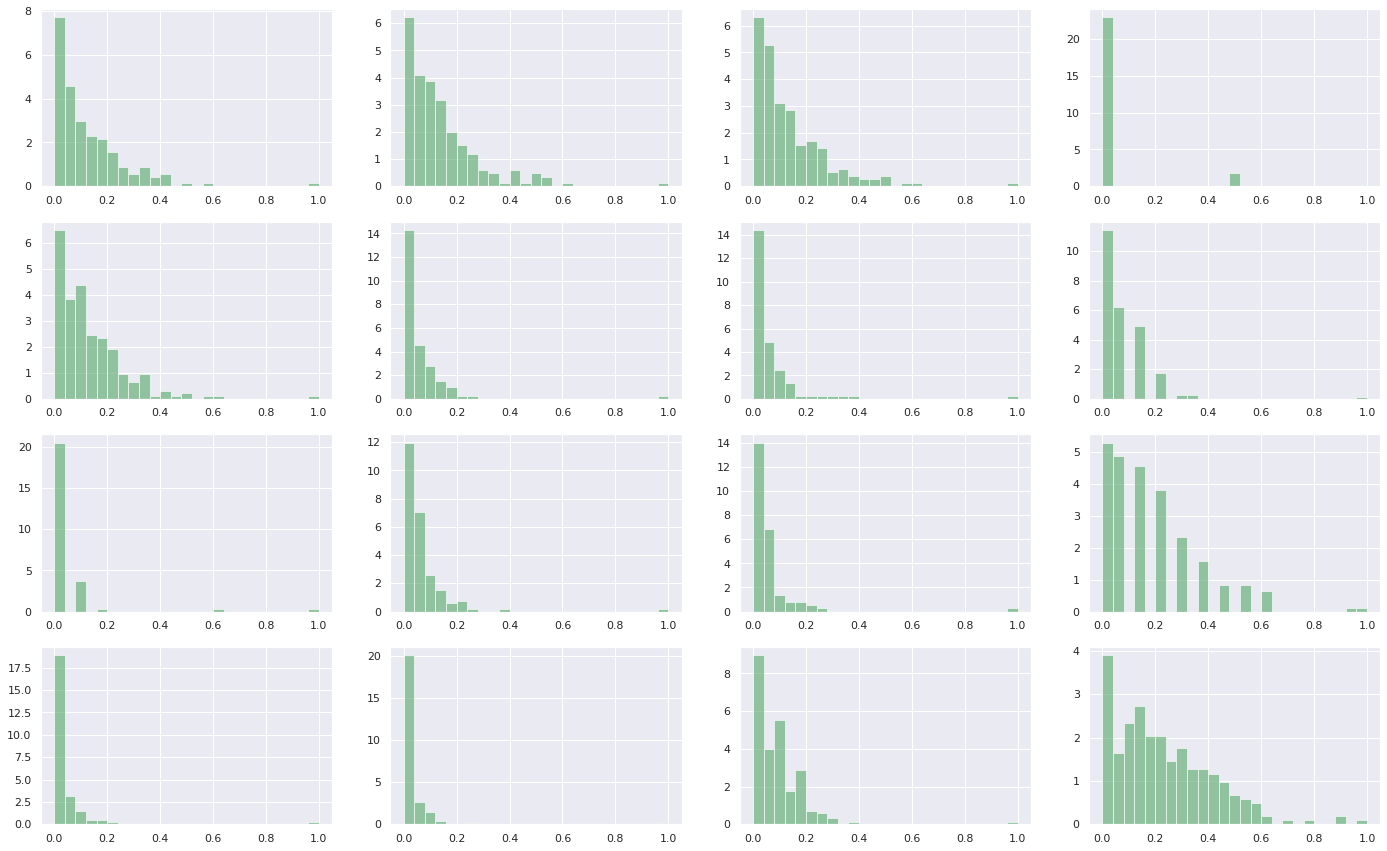

In [ ]:
channelLength = np.shape(zarr.open(fname2 + '//' + 'Tile_0_0.zarr')[0, 0, :])[0]
fname2 = 'Sample Data'


bd = []
for i in range(channelLength):
    data = np.array(zarr.open(fname2 + '//' + 'Tile_0_0.zarr')[:, :, i])
    f_lower_star = d.fill_freudenthal(np.array(data, dtype='float64'))
    p = d.homology_persistence(f_lower_star)
    dgms = d.init_diagrams(p, f_lower_star)
    birth0=np.array([dgm.birth for dgm in dgms[0]])
    death0=np.array([dgm.death for dgm in dgms[0]])
    death0[death0==np.Infinity] = np.partition(death0.flatten(), -2)[-2]
    birth1=np.array([dgm.birth for dgm in dgms[1]]) # We can try only using dim1 features
    death1=np.array([dgm.death for dgm in dgms[1]])
    death1[death1==np.Infinity] = np.partition(death1.flatten(), -2)[-2]
    temp0 = np.vstack((birth0, death0)).T
    temp1 = np.vstack((birth1, death1)).T
    temp = np.concatenate((temp0, temp1))
    # normalize the vector
    bdTemp = temp[:, 1] - temp[:, 0]
    bdTemp = (bdTemp - np.min(bdTemp)) / (np.max(bdTemp) - np.min(bdTemp))
    bd.append(bdTemp)

#plt.hist(bd[3], bins=25, density=True, alpha=0.6, color='g')
#plt.show()

fig= plt.figure(figsize=(24,15))
for channelNum in np.arange(16):
    ax = fig.add_subplot(4,4,1+channelNum)
    plt.hist(bd[channelNum], bins=25, density=True, alpha=0.6, color='g')

plt.show()


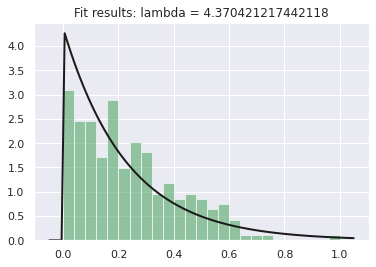

In [ ]:
from scipy.stats import expon

# Fit a normal distribution to the data:
data = bd[15]
loc, scale = expon.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: lambda = {}".format(1/scale)
plt.title(title)

plt.show()